In [3]:
# General:
import tweepy           # To consume Twitter's API
import pandas as piid     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#consumer_key="Ev93iW0STr4EymlrqiImSE9yx"
consumer_key = "aHtGWhDgKtBTfohXBe9gMdUgh"

#consumer_secret="xXwORVl6WDjjAIZqhfca4xswBuLs4JQ4EIsWHdfwLay3wdQa5j"
consumer_secret="pSpOjgCvKcoW9ZmLtfrzKk4JpA7604VLlA0N5Thz2CvPEMk344"

#access_token="1037717238525190144-m88Se0GNRFoRb1o00YybdOTXlKCLMG"
access_token="710845973400915968-rexTM2eE79GX0PvX10Ervme2pbMTXFE"

#access_token_secret="u5HI3J7ENvk7oOughDKZQKziBvxIg3NZ0RSSalG2HZMW4"
access_token_secret="9jC9udCr8GAXqLzvA8WAKJG8VvchAVl8HQWziF3oaIRq8"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [5]:
# We create a tweet list as follows:
tweets = api.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

NBC News incorrectly reported (as usual) that I was limiting the FBI investigation of Judge Kavanaugh, and witnesse… https://t.co/lhsF1IAabe

Thank you West Virginia - I love you! https://t.co/Ou2umCfKp9

https://t.co/BxlF4grr9k

Heading to West Virginia now. Big Rally. Will be live on @FoxNews tonight. Long lines, but will be great!

Senator Richard Blumenthal must talk about his fraudulent service in Vietnam, where for 12 years he told the people… https://t.co/EAw5lZrDLJ



In [6]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,NBC News incorrectly reported (as usual) that ...
1,Thank you West Virginia - I love you! https://...
2,https://t.co/BxlF4grr9k
3,Heading to West Virginia now. Big Rally. Will ...
4,Senator Richard Blumenthal must talk about his...
5,"Just started, tonight, our 7th FBI investigati..."
6,Judge Kavanaugh showed America exactly why I n...
7,https://t.co/9o5gZlJiTd
8,"Join me this Saturday in Wheeling, West Virgin..."
9,RT @WhiteHouse: President Trump and Prime Mini...


In [7]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1046230634103025664
2018-09-30 02:49:55
Twitter for iPhone
89091
27681
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/lhsF1IAabe', 'expanded_url': 'https://twitter.com/i/web/status/1046230634103025664', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [9]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [10]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,NBC News incorrectly reported (as usual) that ...,140,1046230634103025664,2018-09-30 02:49:55,Twitter for iPhone,89091,27681
1,Thank you West Virginia - I love you! https://...,61,1046201064469549056,2018-09-30 00:52:25,Twitter for iPhone,50657,11313
2,https://t.co/BxlF4grr9k,23,1046200796944191499,2018-09-30 00:51:22,Twitter for iPhone,38437,10485
3,Heading to West Virginia now. Big Rally. Will ...,105,1046136712987103241,2018-09-29 20:36:43,Twitter for iPhone,59489,12013
4,Senator Richard Blumenthal must talk about his...,140,1046135994267963392,2018-09-29 20:33:51,Twitter for iPhone,109817,36733
5,"Just started, tonight, our 7th FBI investigati...",140,1045832351211835392,2018-09-29 00:27:17,Twitter for iPhone,167205,39434
6,Judge Kavanaugh showed America exactly why I n...,140,1045444544068812800,2018-09-27 22:46:17,Twitter for iPhone,316476,84701
7,https://t.co/9o5gZlJiTd,23,1045098909352235008,2018-09-26 23:52:51,Twitter for iPhone,75876,17150
8,"Join me this Saturday in Wheeling, West Virgin...",114,1045052439521624067,2018-09-26 20:48:12,Twitter for iPhone,51984,14368
9,RT @WhiteHouse: President Trump and Prime Mini...,132,1045052203784962049,2018-09-26 20:47:16,Twitter for iPhone,0,7646


In [11]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 118.985


In [12]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Judge Kavanaugh showed America exactly why I nominated him. His testimony was powerful, honest, and riveting. Democ… https://t.co/RYPP0I2x7P
Number of likes: 316476
140 characters.

The tweet with more retweets is: 
Judge Kavanaugh showed America exactly why I nominated him. His testimony was powerful, honest, and riveting. Democ… https://t.co/RYPP0I2x7P
Number of retweets: 84701
140 characters.



In [13]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

Text(0.5,1,'Tweets frequency')

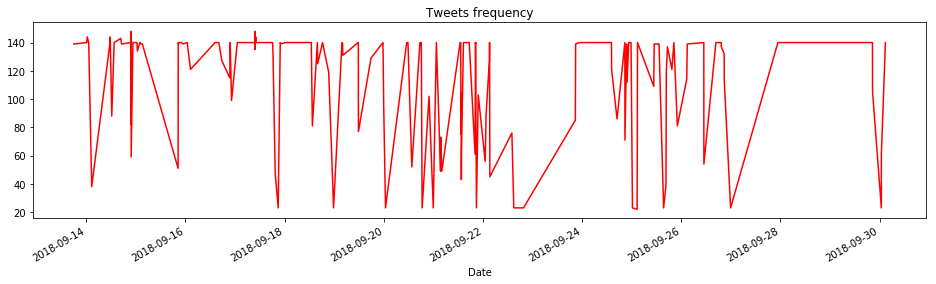

In [22]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');
plt.title('Tweets frequency')

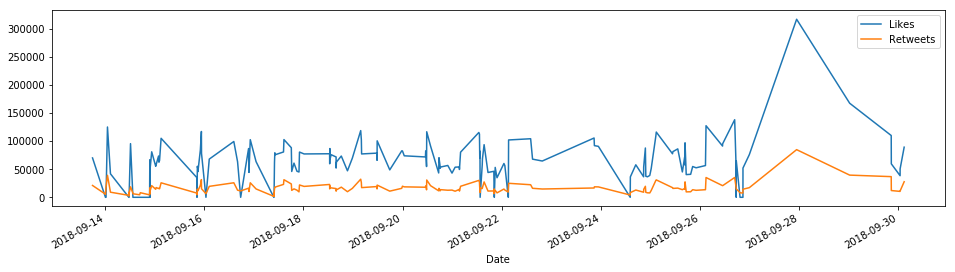

In [15]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [16]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter for iPad


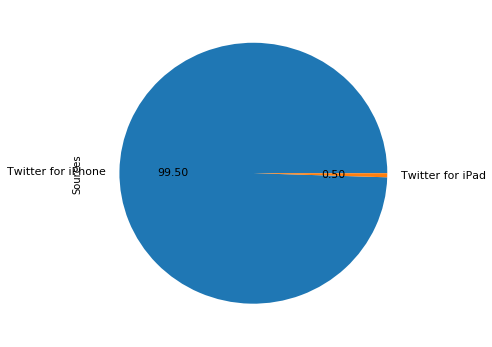

In [17]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [18]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [19]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,NBC News incorrectly reported (as usual) that ...,140,1046230634103025664,2018-09-30 02:49:55,Twitter for iPhone,89091,27681,-1
1,Thank you West Virginia - I love you! https://...,61,1046201064469549056,2018-09-30 00:52:25,Twitter for iPhone,50657,11313,1
2,https://t.co/BxlF4grr9k,23,1046200796944191499,2018-09-30 00:51:22,Twitter for iPhone,38437,10485,0
3,Heading to West Virginia now. Big Rally. Will ...,105,1046136712987103241,2018-09-29 20:36:43,Twitter for iPhone,59489,12013,1
4,Senator Richard Blumenthal must talk about his...,140,1046135994267963392,2018-09-29 20:33:51,Twitter for iPhone,109817,36733,0
5,"Just started, tonight, our 7th FBI investigati...",140,1045832351211835392,2018-09-29 00:27:17,Twitter for iPhone,167205,39434,0
6,Judge Kavanaugh showed America exactly why I n...,140,1045444544068812800,2018-09-27 22:46:17,Twitter for iPhone,316476,84701,1
7,https://t.co/9o5gZlJiTd,23,1045098909352235008,2018-09-26 23:52:51,Twitter for iPhone,75876,17150,0
8,"Join me this Saturday in Wheeling, West Virgin...",114,1045052439521624067,2018-09-26 20:48:12,Twitter for iPhone,51984,14368,0
9,RT @WhiteHouse: President Trump and Prime Mini...,132,1045052203784962049,2018-09-26 20:47:16,Twitter for iPhone,0,7646,1


In [20]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [21]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 55.5%
Percentage of neutral tweets: 35.0%
Percentage de negative tweets: 9.5%
